In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:

import cv2
from keras.models import Sequential
from keras import layers, Model
import time
from IPython.display import clear_output
from matplotlib import pyplot as plt


######### Make replicable the results
seed_value=42

import os
os.environ['PYTHONHASHSEED']=str(seed_value)

import random
random.seed(seed_value)

import numpy as np
np.random.seed(seed_value)

In [3]:
def read_and_resize_image(filename, grayscale = False, fx= 0.5, fy=0.5):
    if grayscale:
      img_result = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
      imgbgr = cv2.imread(filename, cv2.IMREAD_COLOR)
      img_result = cv2.cvtColor(imgbgr, cv2.COLOR_BGR2RGB)
    img_result = cv2.resize(img_result, None, fx=fx, fy=fy, interpolation = cv2.INTER_CUBIC)
    return img_result
  
def showInRow(list_of_images, titles = None, disable_ticks = False):
  plt.rcParams["figure.figsize"] = (16, 10) # (w, h)
  count = len(list_of_images)
  for idx in range(count):
    subplot = plt.subplot(1, count, idx+1)
    if titles is not None:
      subplot.set_title(titles[idx])
      
    img = list_of_images[idx]
    cmap = 'gray' if (len(img.shape) == 2 or img.shape[2] == 1) else None
    subplot.imshow(img, cmap=cmap)
    if disable_ticks:
      plt.xticks([]), plt.yticks([])
  plt.show()
  
def show_in_column(list_of_images, titles = None, disable_ticks = False):
  count = len(list_of_images)
  # set inline plots size
  plt.rcParams["figure.figsize"] = (16, 10) # (w, h)
  for idx in range(count):
    subplot = plt.subplot(count, 1, idx+1)
    if titles is not None:
      subplot.set_title(titles[idx])
      
    img = list_of_images[idx]
    cmap = 'gray' if (len(img.shape) == 2 or img.shape[2] == 1) else None
    subplot.imshow(img, cmap=cmap)
    if disable_ticks:
      plt.xticks([]), plt.yticks([])
  plt.show()

def creatingList1sInFolder(NameDirectoriy):
    List1 = os.listdir(NameDirectoriy)
    ListFull = list()
    
    for entry in List1:
        FilePath = os.path.join(NameDirectoriy, entry)
        if os.path.isdir(FilePath):
            ListFull = ListFull + creatingList1sInFolder(FilePath)
        else:
            ListFull.append(FilePath)
                
    return ListFull

def files_folder(dir):
  entries = os.listdir(dir)

  ListPathImages = list()
  for i in entries:
    dir_i=os.path.join(dir,i)
    ListPathImages.append(creatingList1sInFolder(dir_i))

  print(ListPathImages)

  j=0
  for i in ListPathImages:
    #print ("Database lenght: "+str(len(i)) )
    j=j+len(i)
  print("Total Images: "+str(j))
  return ListPathImages



In [ ]:
#!!! This section create a folder in google drive, just run one time
%cd /content/drive/MyDrive/

!mkdir CV-Proyect
%cd CV-Proyect

!git clone https://github.com/Jose-R-Corona/Iris-GAN-ProyectCV


#!mkdir stylegan2-colab_copy   #name of the folder

/content/drive/MyDrive
mkdir: cannot create directory ‘CV-Proyect’: File exists
/content/drive/MyDrive/CV-Proyect
fatal: destination path 'Iris-GAN-ProyectCV' already exists and is not an empty directory.


In [13]:
%cd /content/drive/MyDrive/CV-Proyect/Iris-GAN-ProyectCV
!git pull

/content/drive/MyDrive/CV-Proyect/Iris-GAN-ProyectCV
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 91 (delta 4), reused 10 (delta 4), pack-reused 81
Unpacking objects: 100% (91/91), done.
From https://github.com/Jose-R-Corona/Iris-GAN-ProyectCV
   e4f60d9..ff58810  main       -> origin/main
Updating e4f60d9..ff58810
Checking out files: 100% (77/77), done.
Fast-forward
 IITD_database/Readme.txt                           |  37 ------
 SRGAN-Keras/Read.txt                               |   1 -
 gif_video.mp4                                      | Bin 0 -> 8968124 bytes
 stylegan2-colab_copy/Read.txt                      |   1 -
 stylegan2-colab_copy/pkl/inception_v3_features.pkl | Bin 0 -> 87270513 bytes
 .../pkl/vgg16_zhang_perceptual.pkl                 | Bin 0 -> 58871973 bytes
 .../_finished.txt                                  |   0
 .../events.out.tfevents.1615071116.f5cf32f94dbe    |

###Processing data  .  Just first time, then load np.arrays at the end

In [4]:
list_files_train=files_folder('/content/drive/My Drive/CV-Proyect/Iris-GAN-ProyectCV/IITD_database/Train')
list_files_test=files_folder('/content/drive/My Drive/CV-Proyect/Iris-GAN-ProyectCV/IITD_database/Test')

[['/content/drive/My Drive/CV-Proyect/Iris-GAN-ProyectCV/IITD_database/Train/031/01_L.bmp', '/content/drive/My Drive/CV-Proyect/Iris-GAN-ProyectCV/IITD_database/Train/031/02_L.bmp', '/content/drive/My Drive/CV-Proyect/Iris-GAN-ProyectCV/IITD_database/Train/031/03_L.bmp', '/content/drive/My Drive/CV-Proyect/Iris-GAN-ProyectCV/IITD_database/Train/031/04_L.bmp', '/content/drive/My Drive/CV-Proyect/Iris-GAN-ProyectCV/IITD_database/Train/031/05_L.bmp', '/content/drive/My Drive/CV-Proyect/Iris-GAN-ProyectCV/IITD_database/Train/031/06_R.bmp', '/content/drive/My Drive/CV-Proyect/Iris-GAN-ProyectCV/IITD_database/Train/031/07_R.bmp', '/content/drive/My Drive/CV-Proyect/Iris-GAN-ProyectCV/IITD_database/Train/031/08_R.bmp', '/content/drive/My Drive/CV-Proyect/Iris-GAN-ProyectCV/IITD_database/Train/031/09_R.bmp', '/content/drive/My Drive/CV-Proyect/Iris-GAN-ProyectCV/IITD_database/Train/031/10_R.bmp'], ['/content/drive/My Drive/CV-Proyect/Iris-GAN-ProyectCV/IITD_database/Train/032/01_L.bmp', '/cont

In [85]:
%cd '/content/drive/My Drive/CV-Proyect/Iris-GAN-ProyectCV/SRGAN-Keras'
!mkdir Iris_JPEG_DELLY  #create folder for the dataset in stylegan2 folder
%cd Iris_JPEG_DELLY
!mkdir normal_resolution
!mkdir low_resolution

%cd '/content/drive/My Drive/CV-Proyect/Iris-GAN-ProyectCV/SRGAN-Keras'
!mkdir Iris_JPEG_DELLY_test
%cd Iris_JPEG_DELLY_test
!mkdir normal_resolution
!mkdir low_resolution

from PIL import Image

def converBMP_JPG(directory,ListPathImages, LowImage=True):
  index1=1
  for database_index in range(len(ListPathImages)):
  #for database_index in range(1,2):
    database = ListPathImages[database_index] #select data base
    index=1
    for img_bmp in database:
      try:
        img = Image.open(img_bmp)
        
        width  = img.size[0]
        height = img.size[1]
        #print(width)
        #print(height)
        ratio = width / float(height)

        #Squared image
        if width > height:
          I_new_width = height
        else:
          I_new_width = width

        I_new_height = I_new_width
        ideal_ratio = I_new_width / float(I_new_height)
        if ratio > ideal_ratio:
            # crop horizontal edges:
            new_width = int(ideal_ratio * height)
            New_offset = (width - new_width) / 2
            crop_image = (New_offset, 0, width - New_offset, height)
        else:
            #crop the vertical edges:
            new_height = int(width / ideal_ratio)
            New_offset = (height - new_height) / 2
            crop_image = (0, New_offset, width, height - offset)

        new_img = img.crop(crop_image).resize((I_new_width, I_new_height), Image.ANTIALIAS)

        #After Squered, resize to 2^n size
        new_img = img.resize( (256, 256) )  #resize image
        nameImg = "image"+str(index1)+"_"+str(index)+".JPEG"

        if LowImage==True:

          dir_image=os.path.join(directory,"normal_resolution",nameImg)
          new_img.save( dir_image, 'JPEG')

          new_img2 = new_img.resize( (64, 64) )    #scaling x2
          dir_image=os.path.join(directory,"low_resolution",nameImg)
          new_img2.save( dir_image, 'JPEG')

        else:
          dir_image=os.path.join(directory,nameImg)
          new_img.save( dir_image, 'JPEG')

      except:
        print("An exception occurred")
      index = index + 1
      #print(index)
      if index > 3000:
          break     
    #print(index) 
    index1 = index1+1
  
directory='/content/drive/My Drive/CV-Proyect/Iris-GAN-ProyectCV/SRGAN-Keras/Iris_JPEG_DELLY'
converBMP_JPG(directory,list_files_train,LowImage=True)

directory='/content/drive/My Drive/CV-Proyect/Iris-GAN-ProyectCV/SRGAN-Keras/Iris_JPEG_DELLY_test'
converBMP_JPG(directory,list_files_test,LowImage=True)


/content/drive/My Drive/CV-Proyect/Iris-GAN-ProyectCV/SRGAN-Keras
mkdir: cannot create directory ‘Iris_JPEG_DELLY’: File exists
/content/drive/My Drive/CV-Proyect/Iris-GAN-ProyectCV/SRGAN-Keras/Iris_JPEG_DELLY
mkdir: cannot create directory ‘normal_resolution’: File exists
mkdir: cannot create directory ‘low_resolution’: File exists
/content/drive/My Drive/CV-Proyect/Iris-GAN-ProyectCV/SRGAN-Keras
mkdir: cannot create directory ‘Iris_JPEG_DELLY_test’: File exists
/content/drive/My Drive/CV-Proyect/Iris-GAN-ProyectCV/SRGAN-Keras/Iris_JPEG_DELLY_test
mkdir: cannot create directory ‘normal_resolution’: File exists
mkdir: cannot create directory ‘low_resolution’: File exists


Loading Data JPEG

In [ ]:
def load_data(directory):
    low_resolution = []
    index=1
    for img in os.listdir(directory + "/low_resolution"):
        img_read = cv2.imread(directory + "/low_resolution/" + img)
        low_resolution.append(img_read)
        index=index+1
        print(index)
    
    low_resolution = np.array(low_resolution) / 255   #normalization
    
    High_resolution = [] 
    index=1   
    for img in os.listdir(directory + "/normal_resolution"):
        img_read = cv2.imread(directory + "/normal_resolution/" + img)
        High_resolution.append(img_read)
        index=index+1
        print(index)
    High_resolution = np.array(High_resolution) / 255 
    
    return low_resolution,High_resolution

train_low, train_high = load_data('/content/drive/My Drive/CV-Proyect/Iris-GAN-ProyectCV/SRGAN-Keras/Iris_JPEG_DELLY')
test_low, test_high = load_data('/content/drive/My Drive/CV-Proyect/Iris-GAN-ProyectCV/SRGAN-Keras/Iris_JPEG_DELLY_test')



Save as numpy arrays

In [87]:
from numpy import save
#save arrays
%cd '/content/drive/My Drive/CV-Proyect/Iris-GAN-ProyectCV/SRGAN-Keras'
save('train_low.npy', train_low)
save('train_high.npy', train_high)
save('test_low.npy', test_low)
save('test_high.npy', test_high)


/content/drive/My Drive/CV-Proyect/Iris-GAN-ProyectCV/SRGAN-Keras


Load numpy arrays  

In [5]:
from numpy import load
# load arrays
%cd '/content/drive/My Drive/CV-Proyect/Iris-GAN-ProyectCV/SRGAN-Keras'
train_low = load('train_low.npy')
train_high = load('train_high.npy')
test_low = load('test_low.npy')
test_high = load('test_high.npy')


/content/drive/My Drive/CV-Proyect/Iris-GAN-ProyectCV/SRGAN-Keras


#Model

In [7]:
from tensorflow.python.keras.layers import Add, BatchNormalization, Conv2D, Dense, Flatten, Input, LeakyReLU, PReLU, Lambda ,UpSampling2D
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import Adam

Generator

In [8]:
def up_scale_b(model_layers_in, size_filter):
    model_layers = Conv2D(size_filter, kernel_size=3, padding='same')(model_layers_in)
    model_layers = UpSampling2D( size = 2 )(model_layers)
    return PReLU(shared_axes=[1, 2])(model_layers)


def residual_block(model_layers_in, size_filter, momentum=0.8):  #momentum=0.5
    model_layers = Conv2D(size_filter, kernel_size=3, padding='same')(model_layers_in)
    model_layers = BatchNormalization(momentum=momentum)(model_layers)
    model_layers = PReLU(shared_axes=[1, 2])(model_layers)
    model_layers = Conv2D(size_filter, kernel_size=3, padding='same')(model_layers)
    model_layers = BatchNormalization(momentum=momentum)(model_layers)
    model_layers2 = Add()([model_layers_in, model_layers])
    return model_layers2


def generator_model():
    size_filter=64
    number_res_blocks=16
    model_layers_in=Input(shape=lowR_shape)
    model_layers = Conv2D(size_filter, kernel_size=9, padding='same',)(model_layers_in)
    model_layers = PReLU(shared_axes=[1, 2])(model_layers)

    model_layers_1 = model_layers
    for i in range(number_res_blocks):
        model_layers = residual_block(model_layers, size_filter)

    model_layers = Conv2D(size_filter, kernel_size=3, padding='same')(model_layers)
    model_layers = BatchNormalization(momentum=0.8)(model_layers)
    model_layers = Add()([model_layers,model_layers_1])

    model_layers = up_scale_b(model_layers, size_filter * 4) #256
    model_layers = up_scale_b(model_layers, size_filter * 4)

    model_layers = Conv2D(3, kernel_size=9, padding='same')(model_layers)   #, activation='tanh'

    # model_layers = Activation('tanh')(model_layers)
    return Model(model_layers_in, model_layers)


Descriminator

In [9]:
def discriminator_b(model_layers_in, size_filter, strides=1, Layer_batch=True, momentum=0.8):
    model_layers = Conv2D(size_filter, kernel_size=3, strides=strides, padding='same')(model_layers_in)
    if Layer_batch:
        model_layers = BatchNormalization(momentum=momentum)(model_layers)
    model_layers = LeakyReLU(alpha=0.2)(model_layers)
    return model_layers


def discriminator_model():
    size_filter=64
    model_layers_in=Input(shape = highR_shape)
    model_layers = discriminator_b(model_layers_in, size_filter, Layer_batch=False)
    model_layers = discriminator_b(model_layers, size_filter, strides=2)
    model_layers = discriminator_b(model_layers, size_filter * 2)
    model_layers = discriminator_b(model_layers, size_filter * 2, strides=2)
    model_layers = discriminator_b(model_layers, size_filter * 4)
    model_layers = discriminator_b(model_layers, size_filter * 4, strides=2)
    model_layers = discriminator_b(model_layers, size_filter * 8)
    model_layers = discriminator_b(model_layers, size_filter * 8, strides=2)

    model_layers = Flatten()(model_layers)
    model_layers = Dense(size_filter*16)(model_layers)
    model_layers = LeakyReLU(alpha=0.2)(model_layers)
    model_layers = Dense(1, activation='sigmoid')(model_layers)

    return Model(model_layers_in, model_layers)


Model

In [10]:
print("Train data shape ", train_high.shape, " Test data shape ", test_high.shape )
print("Train low data shape ", train_low.shape, " Test data shape ", test_low.shape )

highR_shape = (train_high.shape[1], train_high.shape[2], train_high.shape[3])
lowR_shape = (train_low.shape[1], train_low.shape[2], train_low.shape[3]) #lowR_shape = (64,64,3)


Input_low = Input(shape=lowR_shape)
Input_high = Input(shape=highR_shape)

Train data shape  (1940, 256, 256, 3)  Test data shape  (300, 256, 256, 3)
Train low data shape  (1940, 64, 64, 3)  Test data shape  (300, 64, 64, 3)


VGG 19

In [11]:
def build_Model_vgg():
    #Model_vgg = VGG19(weights="imagenet")

    #Model_vgg.outputs = [Model_vgg.layers[9].output]
    
    #input_vgg = Input(shape=highR_shape)
    
    #model_vgg_input = Model_vgg(input_shape=highR_shape)
    #print("antes")
    
    #return Model(input_vgg, model_vgg_input)

    Model_vgg = VGG19(input_shape=highR_shape, include_top=False,weights="imagenet")
    return Model(Model_vgg.input, Model_vgg.layers[9].output)

In [12]:
#@title
def create_full_model(generator_model, discriminator_model, vgg19_model, Input_low1, Input_high1):
    generator_m_head = generator_model(Input_low1)
    
    generator_features = vgg19_model(generator_m_head)
    
    discriminator_model.trainable = False
    generator_discriminator_m = discriminator_model(generator_m_head)
    
    return Model(inputs=[Input_low1, Input_high1], outputs=[generator_discriminator_m, generator_features])

generator = generator_model() 
discriminator = discriminator_model()
discriminator.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

vgg = build_Model_vgg()
vgg.trainable = False


SRGAN_model = create_full_model(generator, discriminator, vgg, Input_low, Input_high)
SRGAN_model.compile(loss=["binary_crossentropy","mse"], loss_weights=[1e-3, 1], optimizer="adam")
SRGAN_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
model (Functional)              (None, 256, 256, 3)  2044291     input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
model_1 (Functional)            (None, 1)            138912577   model[0][0]                      
____________________________________________________________________________________________

In [13]:
generator.summary()
print("######################################################################################################")
discriminator.summary()
print("######################################################################################################")
SRGAN_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 64, 64, 64)   15616       input_3[0][0]                    
__________________________________________________________________________________________________
p_re_lu (PReLU)                 (None, 64, 64, 64)   64          conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 64)   36928       p_re_lu[0][0]                    
______________________________________________________________________________________________

#Training model

In [14]:
Size_batch = 20
train_batch_low = []
train_batch_high = []
#size of batch
for batch_i in range(int(train_high.shape[0] / Size_batch)):
    index1 = batch_i*Size_batch
    index2 = index1 + Size_batch
    train_batch_high.append(train_high[index1:index2])
    train_batch_low.append(train_low[index1:index2])

In [ ]:
total_epoch = 100
print("start")
for epoch in range(total_epoch):
    
    label_generated = np.zeros((Size_batch, 1))   #arrays for discrimination, 0 fake , 1 real
    label_correct = np.ones((Size_batch, 1))   

    generator_losses = []
    discriminator_losses = []
    for i in range(len(train_batch_high)):
        low_temp = train_batch_low[i]
        high_temp = train_batch_high[i]
        
        generated_images = generator.predict_on_batch(low_temp)
        
        discriminator.trainable = True
        batch_loss_generated = discriminator.train_on_batch(generated_images, label_generated)
        batch_loss_correct = discriminator.train_on_batch(high_temp, label_correct)
        
        discriminator.trainable = False
        discrim_loss = 0.5 * np.add(batch_loss_generated, batch_loss_correct) 
        
        image_features = vgg.predict(high_temp)

        
        generat_loss, _, _ = SRGAN_model.train_on_batch([low_temp, high_temp], [label_correct, image_features])
        
        discriminator_losses.append(discrim_loss)
        generator_losses.append(generat_loss)
        
    generator_losses = np.array(generator_losses)
    discriminator_losses = np.array(discriminator_losses)
    
    generat_loss = np.sum(generator_losses, axis=0) / len(generator_losses)
    discrim_loss = np.sum(discriminator_losses, axis=0) / len(discriminator_losses)
    
    print("epoch:", epoch+1 ,"generat_loss:", generat_loss, "discrim_loss:", discrim_loss)

    if (epoch+1) % 5 == 0:    #save each 20 epoch
      print("safe")
      discriminator.save_weights("/content/drive/My Drive/CV-Proyect/Iris-GAN-ProyectCV/SRGAN-Keras/Model/discriminator_epoch_"+ str(epoch+1) +".h5")
      generator.save_weights("/content/drive/My Drive/CV-Proyect/Iris-GAN-ProyectCV/SRGAN-Keras/Model/generator_epoch_"+ str(epoch+1) +".h5")

start
epoch: 1 generat_loss: 23.370723350760862 discrim_loss: [20.44264397  0.74484536]
epoch: 2 generat_loss: 16.09110811567798 discrim_loss: [2.69420031 0.8507732 ]
epoch: 3 generat_loss: 12.777513661335425 discrim_loss: [2.64849702 0.83273196]
epoch: 4 generat_loss: 11.406640401820546 discrim_loss: [1.41374069 0.89407216]


##Test Result

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


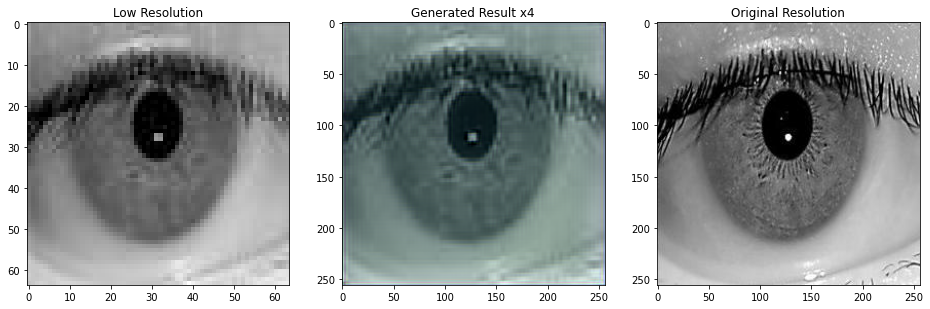

In [41]:
img_generated_result = generator.predict_on_batch(train_batch_low[0])
showInRow([train_batch_low[0][0],img_generated_result[0],train_batch_high[0][0]],["Low Resolution","Generated Result x4","Original Resolution"])

Evaluation of loss and accurracy

In [43]:
dataset_labels = np.ones((len(test_low),1))
test_dataset_f = vgg.predict(test_high)
evaluation_data_test = SRGAN_model.evaluate([test_low, test_high], [dataset_labels, test_dataset_f],10 )
print("Test dataset loss and accuracy:", evaluation_data_test)

30/30 [==============================] - 4s 148ms/step - loss: 16.6170 - model_1_loss: 7.5754 - model_2_loss: 16.6094
Test dataset loss and accuracy: [16.617015838623047, 7.575362205505371, 16.60943603515625]


Test generator in the test dataset

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(20, 256, 256, 3)


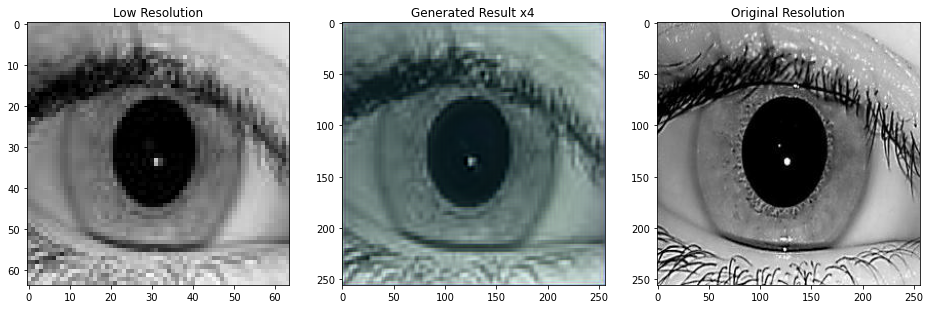

In [42]:
index1=9
test_low_batch=[]
test_low_batch.append(test_low[index1:(index1+20)])
img_generated_result = generator.predict_on_batch(test_low_batch)
print(img_generated_result.shape)

index3 = 1
showInRow([test_low[index1+index3],img_generated_result[index3],test_high[index1+index3]],["Low Resolution","Generated Result x4","Original Resolution"])